# Importing Data for Data Science

## Accessing Data From Text Files

Accessing data from a text file is straightforward. 

In [15]:
# Load a simple text file into a string variable
f = open("test_text.txt", "r")
lines = f.readlines()
f.close()

# Iterate through each line in the file and print it out
for line in lines:
    print("****", line)

**** This is a simple text file that we will use to demonstrate file hadnling in Python. We will also use it to show off how the NLTK tonkenisers can be used. We'll see that tokenisers are very useful. This is one last sentence for extra interest!! 

**** This is another paragraph that really doesn't say anything. 

**** This was written by Dr. Brian Mac Namee.


In [16]:
for line in lines:
    print("****")
    words = line.split(" ")
    for word in words:
        print(word)

****
This
is
a
simple
text
file
that
we
will
use
to
demonstrate
file
hadnling
in
Python.
We
will
also
use
it
to
show
off
how
the
NLTK
tonkenisers
can
be
used.
We'll
see
that
tokenisers
are
very
useful.
This
is
one
last
sentence
for
extra
interest!!


****
This
is
another
paragraph
that
really
doesn't
say
anything.


****
This
was
written
by
Dr.
Brian
Mac
Namee.


We can even load a text file across the Internet by using **requests.get** from the **requests** package instead of simply **open**. We use [the Guttenberg Press](http://www.gutenberg.org) in this example.

In [1]:
# Import the requests package
import requests

# Define a URL to Alice in Wonderland on the Guttenberg Press (www.gutenberg.org)
url='http://www.gutenberg.org/cache/epub/11/pg11.txt'

# Read the text from the URL
text_page = requests.get(url).text

# Print the first 500 characters of the book
print(text_page[:1000])

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the u


We can even connnect to a HTML file, but this starts to get really hard.

In [2]:
# Connect to a URL and extract the HTML text
url = "http://www.independent.ie/sport/soccer/international-soccer/neil-taylor-facing-longer-ban-for-seamus-coleman-horror-tackle-as-fifa-step-in-35578919.html"
text = requests.get(url).text
print(text[:1000])

<!DOCTYPE html>
<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml">
<!-- generated by inm-prod-presentation-engine-spot-174.inm.lan 2017-04-12T20:47:17.472 -->
<head>
<script type='text/javascript'>var _sf_startpt=(new Date()).getTime()</script>
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
<link rel="canonical" href="http://www.independent.ie/sport/soccer/international-soccer/neil-taylor-facing-longer-ban-for-seamus-coleman-horror-tackle-as-fifa-step-in-35578919.html" >
<link rel="alternate" media="only screen and (max-width: 640px)" href="http://m.independent.ie/sport/soccer/international-soccer/neil-taylor-facing-longer-ban-for-seamus-coleman-horror-tackle-as-fifa-step-in-35578919.html" >
<script type="text/javascript">
window.lightbox = { displayAdsCount :3 };
</script>
<link rel="shortcut icon" href="http://www.independent.ie/img/favicon-independ

## Parsing HTML Files

Accessing data from web pages is straightforward. The tricky bit is extracting the useful information from the webpage. We can use the **BeautifulSoup4** (http://www.crummy.com/software/BeautifulSoup) packages to make this easier.

In [3]:
# Import the BeautifulSoup package
from bs4 import BeautifulSoup 

# Read the HTML file
url = "http://www.independent.ie/sport/soccer/international-soccer/neil-taylor-facing-longer-ban-for-seamus-coleman-horror-tackle-as-fifa-step-in-35578919.html"
html = requests.get(url).text

# Create a beautiful soup object from the text file so that we get at the article text
article_soup = BeautifulSoup(html, "lxml")

# Extract the actual article text  - this relies on the fact that I know what the HTML looks like, not completely robust!
article = article_soup.find('article')
headline = article.find('h1')
article_content = article.find_all('div', class_='ctx_content')

# Start the article text by adding the headline
article_text = headline.get_text()

# Construct the article by adding togehter the paragraph pieces
for tag in article_content:
    article_text += tag.get_text()
    
# Print the article content
print(article_text)

Neil Taylor facing longer ban for Seamus Coleman horror tackle as FIFA step in

FIFA has opened proceedings against Neil Taylor following the Wales defender's challenge on Republic of Ireland defender Seamus Coleman.


Everton defender Coleman needed surgery on a broken tibia and fibula after being injured in the 69th minute of Friday's World Cup qualifying match at the Aviva Stadium, which finished in a goalless draw.

Coleman faces months on the sidelines and Taylor, who will definitely miss Wales' next qualifier away to Serbia in June, faces the prospect of having his automatic one-match ban extended.The Football Association of Wales has been informed of FIFA opening proceedings against Taylor and will review the incident.

The hearing is likely to be held within the next fortnight and Taylor's ban could be increased to three games once FIFA studies the report of match referee Nicola Rizzoli.If Taylor does receive a three-match ban that would also rule the Aston Villa defender out o

A wordcloud is a fun way to visualise text

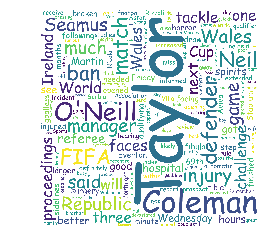

In [4]:
# Import matplotlib
import matplotlib 
import matplotlib.pyplot as plt

# Import package for drawing word clouds this needs to be installed from binstar using ./conda install -c https://conda.binstar.org/derickl wordcloud
from wordcloud import WordCloud, STOPWORDS 

# Create a word cloud
wordcloud = WordCloud(font_path='/Library/Fonts/Comic Sans MS.ttf',
                     stopwords=STOPWORDS,
                      background_color='white',
                      width=2400,
                      height=2400
                     ).generate(article_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Accessing RSS Feeds 

One way to access lots of news articles is to use an RSS feed. We can access RSS feeds easily in Python using the **feedparser** package.

In [19]:
# For reading RSS feeds - imstnall using ./conda install feedparser
import feedparser 

# Read from the Irish Times RSS feed
RSS_url = "https://www.irishtimes.com/cmlink/news-1.1319192"
it_feed = feedparser.parse(RSS_url)
len(it_feed.entries)

# Iterate through the entries from the feed and print the title of each article and the URL for the articl
for article_entry in it_feed.entries:
    article_title = article_entry['title']
    article_url = article_entry['links'][0]['href']
    print(article_title)
    print(article_url)

Woman alleges  sexual assault at Cathal Brugha army barracks
http://www.irishtimes.com/news/crime-and-law/woman-alleges-sexual-assault-at-cathal-brugha-army-barracks-1.3046800
Inquest into man’s fatal  brain haemorrhage criticised by partner
http://www.irishtimes.com/news/crime-and-law/courts/coroner-s-court/inquest-into-man-s-fatal-brain-haemorrhage-criticised-by-partner-1.3046759
Gardaí release suspect in investigation into Real IRA murder
http://www.irishtimes.com/news/crime-and-law/garda%C3%AD-release-suspect-in-investigation-into-real-ira-murder-1.3046748
Childcare subsidies for 9,000 families delayed over IT issues
http://www.irishtimes.com/news/social-affairs/childcare-subsidies-for-9-000-families-delayed-over-it-issues-1.3046461
Customs officers seize 107 litres of wine at Rosslare
http://www.irishtimes.com/news/crime-and-law/customs-officers-seize-107-litres-of-wine-at-rosslare-1.3046742
Cystic fibrosis patients hopeful further  drugs may be developed
http://www.irishtimes.com

## Accessing Data From Twitter

Twitter is obviously a fun service to get text from. We can use the **Tweepy** package to access the Twitter API. Before using Tweepy you must have Twitter **OAuth credentials** available from https://apps.twitter.com/. Create a new applciation (using your own Twitter credentials) and the generate access tokens.

In [13]:
# Import tweepy 
import tweepy

# OAuth access details for getting at the Twitter API - having these in my code is pretty insecure!!
consumer_key = "ENTER YOUR KEY HERE"
consumer_secret = "ENTER YOUR SECRET HERE"
access_token = "ENTER YOUR TOKEN HERE"
access_token_secret = "ENTER YOUR TOKEN HERE" 

# Connect to the Twitter API using authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Access the tweets appearing in my timeline
coord_list = list()
public_tweets = api.home_timeline(count=25)
for tweet in public_tweets:
    print("@" + tweet.author.screen_name, "|", tweet.author.name)
    print(tweet.text)
    print() 
    

@ireland | Ireland / Harold
The bottle is shook to make sure the sample is even. A test tube is half filled and the yield written on the top of… https://t.co/PrHsVUPxxd

@DublinInquirer | Dublin Inquirer
When kids' stones smash windows on the 40 route, Dublin Bus suspends it for the day. Locals says that's unfair.… https://t.co/HdDylcm5S1

@UlyssesReader | Ulysses Reader
Down went Tom Rochford anyhow, booky's vest and all, with the rope round him.

@TIME | TIME
Meet the man who trolled Sean Spicer, Pepsi and United Airlines in one meme https://t.co/DY7PWZoamd

@ThisHeadStuff | HeadStuff
The Real Reason We Need Trigger Warnings

Don't just roll your eyes at them.

#Triggered #Science #Psychology… https://t.co/rUJxqnuDnT

@ForecasterEnten | (((Harry Enten)))
Why I think Brownback may have played a role in last night's results, but I think the national environment did too.… https://t.co/5n5T02kqI4

@PhotosOfDublin | Photos of Dublin
RT @TazMoMedia: Dublin you are... a colourful canvas...


In [17]:
#Search for recent tweets containing a specific keyword
results = api.search(q="Dublin", count=10)
for tweet in results:
    print("@" + tweet.author.screen_name, "|", tweet.author.name)
    print(tweet.text)
    print() 

@McAuliffeJA | Julieanne McAuliffe
https://t.co/zhpLbhGHme

@hill473_susan | Susan Hill
#dublin #pechos android #girl cdmx #nerddating #ebony unused https://t.co/qOTuOKVbb9

@84stephenfox | Stephen Fox
@wolfetones How's it going lads, planning any gigs in Dublin?? U's were brilliant in the barrow lands a few months ago 👌🏼☘️🇮🇪

@Fin_Dublin | Fin~Dublin
@betsy_klein @POTUS Trump contradicting himself and talking inane babble. Hardly worth pointing that out at this stage.

@dommyolivia | Dominique Yong
Dublin business women - interested in joining a new networking group?#iwib #LMBDW #irishbizparty #irishtechparty #tweetursis #womeninspire

@Lottieeeeee1992 | Char ☺️
Last working day tomorrow before a nice little four days off!  Cinema tomorrow evening then Dublin for the weekend 🍻☘️✈️ #adventure #happy 😊

@CNewday | Gordon Cassidy
In fact since no one cares how about we make ,City West Digital Park, Naas Road Dublin 24. obliterate MOLACH right outside EIR. AN 6PM News

@ronanmooney | Rona

## An Introduction To NLTK

The **Natural Language Toolkit**, **NLTK** (http://www.nltk.org/), is a well written, widely used, and well respected toolkit for perofmring natural langueg processing in Python. It offers a wide range of useful functionality and data structres that make text natural langueg processing, and so text analytics, much easier. Features included in the NLTK include corpus management, document classification, colocation discoverym, part of speech tagging, parsing, and chunking. The best reference for the NLTK is the **NLTK Book**, Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit by Steven Bird, Ewan Klein, and Edward Loper, which is freely avialble online at http://www.nltk.org/book/ or for sale at http://www.amazon.co.uk/Natural-Language-Processing-Python-Steven/dp/0596516495. Many of the examples in this tutorial are taken from this book.

### Import Packages

Import a set of packages that we will use in order to perform text analysis. These are very commonly used Python packages.

In [33]:
import nltk # The best known Python natural language processing toolkit
from nltk import FreqDist # Explicitlty import the FreqDist function from NLTK
import numpy # Package for scientific computing
import matplotlib # Python plotting library
import matplotlib.pyplot as plt # Easy syntax access to pyplot
import re # functions fior dealing with regular expressions
from wordcloud import WordCloud, STOPWORDS # package for drawing word clouds this needs to be installed from binstar using ./conda install -c https://conda.binstar.org/derickl wordcloud
from urllib.request import urlopen # for accessing URLs
from bs4 import BeautifulSoup # For parsing HTML documents

# Tells iPython notebook to draw graphic sinline in the webpage
%matplotlib inline 

In [4]:
# Uncomment this in order to launch the NLTK downloader to access corpora, packages etc
# nltk.download()

### Load An NLTK Built-In Corpus

In [34]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### Find Text Within a Corpus

A concordance returns a set of sentences that include a search term or terms. We first create an NLTK text object that we can manipulate.

In [36]:
hamlet = nltk.Text(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))
print(hamlet)

<Text: The Tragedie of Hamlet by William Shakespeare 1599>


Using the NLTK **concordance** function we can generate a set of setences containing a chose word.

In [37]:
hamlet.concordance("ophelia")

Displaying 25 of 28 matches:
Polonius , Laertes , and his Sister Ophelia , Lords Attendant . King . Though y
er . Scena Tertia Enter Laertes and Ophelia . Laer . My necessaries are imbark 
is vnmastred importunity . Feare it Ophelia , feare it my deare Sister , And ke
 your seruants tend Laer . Farewell Ophelia , and remember well What I haue sai
well . Exit Laer . Polon . What ist Ophelia he hath said to you ? Ophe . So ple
 , Then may be giuen you . In few , Ophelia , Doe not beleeue his vowes ; for t
ol . Well , my Lord . Enter . Enter Ophelia . Polon . Farewell : How now Opheli
phelia . Polon . Farewell : How now Ophelia , what ' s the matter ? Ophe . Alas
y Soules Idoll , the most beautifed Ophelia . That ' s an ill Phrase , a vilde 
 But neuer Doubt , I loue . O deere Ophelia , I am ill at these Numbers : I hau
it Enter King , Queene , Polonius , Ophelia , Rosincrance , Guildenstern , and 
ere by accident , may there Affront Ophelia . Her Father , and my selfe ( lawfu
 shall obey

We can generate a text object containing all of the texts in our corpus and generate a concordance from this.

In [38]:
allText = nltk.Text(nltk.corpus.gutenberg.words())
allText.concordance('sandwich')

Displaying 4 of 4 matches:
ck , a large Colt ' s revolver , a sandwich case , and a formidable flask of b
re I came up ; or more proper , MY SANDWICH , I should say , for the fashion '
ucket ship in the harbor of Oahu , Sandwich Islands . Conversation turning upo
some honest mariners of Dover , or Sandwich , or some one of the Cinque Ports 


**EXERCISE:** Genrate a concordance of the occurences of the word *whale* in *Moby Dick* and the word *computer* in the overall gutenburg corpus. 

A **dispersion plot** is a fun data visualsiation supported by NLTK that shows us where in a text words appear. It is generated using the **dispersion_plot** function.

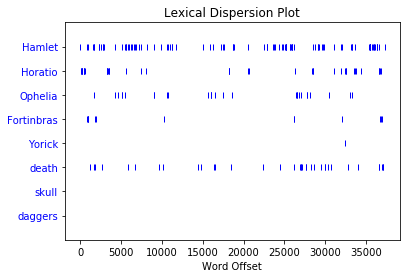

In [41]:
hamlet.dispersion_plot(["Hamlet", "Horatio", "Ophelia", "Fortinbras", "Yorick", "death", "skull", "dagger"])

A more powerful way that we can find text within a corpus is to use **regular expressions**. Regular expressions are a powerful way to define textual patterns that allow us find interesting things within a document. First just find all words ending in "ings".

In [10]:
list(set([w for w in hamlet if re.search('ings$', w)]))

['pratlings',
 'things',
 'Groundlings',
 'Trappings',
 'Vndertakings',
 'Greetings',
 'Kings',
 'Slings',
 'springs',
 'Mornings',
 'commings',
 'concernings',
 'stockings',
 'Sings',
 'sings',
 'strings',
 'droppings',
 'Things',
 'wings',
 'nothings']

This is some nice Python code to iterate through all the words in our hamlet list, and to add those that match our regular expression to a new list. Python is great for this type of stuff!

In the next example we consider a Hamlet-based crossword puzzle in which we we need to find a word that matches this pattern: \_ \_ m \_ \_ t 

In [11]:
 list(set([w for w in hamlet if re.search('^..m..t$', w)]))

['almost',
 'Hamlet',
 'Almost',
 'lament',
 'Vnmixt',
 'inmost',
 'Somnet',
 'moment',
 'sement']

There is tonnes that you can do with regular expressions - find dates, find phone numbers, find matches for types of words, find pattrerns across multiple words .... The basic operators for definining regular expressions are as follows.

Operator | Behavior
----------|------------
. |	Wildcard, matches any character
^abc |	Matches some pattern abc at the start of a string
abc\$ |	Matches some pattern abc at the end of a string
[abc] |	Matches one of a set of characters
[A-Z0-9] |	Matches one of a range of characters
ed $\mid$ ing $\mid$ s |	Matches one of the specified strings (disjunction)
* |	Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+ |	One or more of previous item, e.g. a+, [a-z]+
? |	Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n} |	Exactly n repeats where n is a non-negative integer
{n,} |	At least n repeats
{,n} |	No more than n repeats
{m,n} |	At least m and no more than n repeats
a(b $\mid$ c)+ |	Parentheses that indicate the scope of the operators

**EXERCISE:** Load the corpus of American presedential inaugural addresses, nltk.corpus.inaugural, and find all mentions of *America*, *freedom*, and *war*.

### Counting Vocabulary

Counting vocabulary is a really important thing to do in text, and we can do it easily in Python with NLTK. First, let's get the number of words in Hamlet.

In [12]:
len(hamlet)

37360

Let's extract the number of unique words - converting from a Python **list** to a Python **set** does this!

In [42]:
len(set(hamlet))

5447

**Lexical diversity** is a technique used to measure how complicated a text is. It is just the ratio of unique words to total words. Higher values indicate more complicated texts.

In [14]:
len(set(hamlet))/len(hamlet)

0.14579764453961455

**EXERCISE:** Calculate the lexical diversity of *Moby Dick* and *Alice In Wonderland*.

We can easily define a lexical diversity function

In [15]:
# Define function to calcualte lexical diversity
def lexical_diversity(text):
    return len(set(text)) / len(text)

# Use the newly defined function to claculate the lexical diversity of hamlet
lexical_diversity(hamlet)

0.14579764453961455

Counting the **most frequently occuring words** in a text is one of the most common ways to analyse the meaning of a text. The NLTK makes this job very easy for us by allowing us to quickly generate a **frequency distribution** using the **FreqDist** function.

In [43]:
# convert all words to lower case
hamlet = [w.lower() for w in hamlet]

# Remove all punctuation from word lists - note the use of regular expressions!
hamlet = [w for w in hamlet if not (re.match(r'^\W+$', w) != None)]

# Remove all stop words from word lists
hamlet = [w for w in hamlet if not w in nltk.corpus.stopwords.words('english')]

#print hamlet

# Print revised lexical diversity
#print '{}{}'.format('Lexical diversity: ', lexical_diversity(hamlet))

# Generate the frquency distribution for hamlet
hamlet_freq_dist = nltk.FreqDist(hamlet)
print(hamlet_freq_dist)


<FreqDist with 4598 samples and 16225 outcomes>


100
Frequency Hamlet: 100
tragedie: 4
hamlet: 100
william: 1
shakespeare: 1
1599: 1
actus: 2
primus: 1
scoena: 1
prima: 1
enter: 85
barnardo: 8
francisco: 2
two: 22
centinels: 1
fran: 8
nay: 26
answer: 9
stand: 15
vnfold: 3
selfe: 68
bar: 7


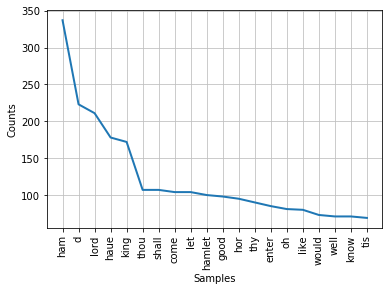

In [44]:
# Print the number of occurences of the word hamlet
print(hamlet_freq_dist['hamlet'])
print('{}{}'.format('Frequency Hamlet: ', hamlet_freq_dist['hamlet']))

# Print the top X words
numWords = 0
wordLimit = 20
for w in hamlet_freq_dist.keys():
    print('{}{}{}'.format(w, ': ', hamlet_freq_dist[w]))
    numWords = numWords + 1
    if numWords > wordLimit:
        break

# Plot a nice graph of word frequencies
hamlet_freq_dist.plot(wordLimit)


We can also plot a word cloud from this frequency distribution (watch out for the path to the font used).

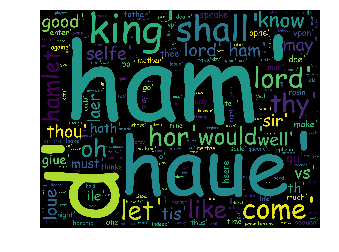

In [45]:
wordcloud = WordCloud(font_path='/Library/Fonts/Comic Sans MS.ttf',
                     stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(str(hamlet))


plt.imshow(wordcloud)
plt.axis('off')
#matplotlib.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

Nice webpage explaining how to make word clouds from your Twitter feed: http://spartanideas.msu.edu/2014/11/28/turn-your-twitter-timeline-into-a-word-cloud-using-python/#A.-Downloading-Your-Twitter-Timeline-Tweets